In [1]:
#导入要用到的模块
import numpy as np
import pandas as pd
import nltk
import re
from bs4 import BeautifulSoup
from sklearn import feature_extraction
import numpy as np  
import lda
import lda.datasets 
import os    
import sys  
import matplotlib  
import scipy  
import matplotlib.pyplot as plt  
from sklearn import feature_extraction    
from sklearn.feature_extraction.text import TfidfTransformer    
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import HashingVectorizer 

In [2]:
review = open('../US.20171130.txt').read().split(','+'\"')

In [ ]:
review[0]

In [3]:
#载入 nltk 的英文停用词作为“stopwords”变量
stopwords = nltk.corpus.stopwords.words('english')

In [4]:
# 载入 nltk 的 SnowballStemmer 作为“stemmer”变量(把一些動詞形式轉換成原型)
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [5]:
#分词
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [6]:
# 分詞器
def tokenize_and_stem(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    #过滤掉非字母，比如数字和间隔等
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [7]:
#文本准备
from gensim import corpora, models, similarities

#remove proper names
preprocess = [strip_proppers(doc) for doc in review]

In [8]:
preprocess[0]

"funko was pretty good the packing was completely smashed in on the side despite it having a inspected or certified sticker on the bottom the strand does n't fit the actual pop but that's more of a manufacturing complaint as've had that happen to me with the pop figure before"

In [9]:
tokenized_text = [tokenize_and_stem(text) for text in preprocess]

In [10]:
tokenized_text = [tokenize_and_stem(text) for text in preprocess]

texts = [[word for word in text if word not in stopwords] for text in tokenized_text]


In [14]:
texts[:3]

[['funko',
  'pretti',
  'good',
  'pack',
  'complet',
  'smash',
  'side',
  'despit',
  'inspect',
  'certifi',
  'sticker',
  'bottom',
  'strand',
  'doe',
  "n't",
  'fit',
  'actual',
  'pop',
  "'s",
  'manufactur',
  'complaint',
  'happen',
  'pop',
  'figur',
  'befor'],
 ['veri',
  'excit',
  'found',
  'got',
  'mouth',
  'close',
  'littl',
  'bum',
  'one',
  'corner',
  'box',
  'damag',
  'due',
  'enough',
  'protect',
  'ship',
  'box',
  'although',
  "'s",
  'littl',
  'flaw',
  'still',
  'happi'],
 ['order',
  '8yr',
  'old',
  'nephew',
  'big',
  'fan',
  'show',
  'read',
  'review',
  'concern',
  "'s",
  'structur',
  'stand',
  'well',
  'knew',
  'clear',
  'stand',
  'becaus',
  'read',
  'review',
  'would',
  "n't",
  'know',
  'look',
  'see',
  'head',
  'big',
  'bodi',
  'tip',
  'stand',
  'well',
  'bump',
  'shelf',
  'coupl',
  'time',
  "n't",
  'fall',
  'packag',
  'came',
  'littl',
  'late',
  'contact',
  'made',
  'awar',
  'arriv',
  'go

In [44]:
tt =[]
for text in texts:
    tt.append(str(text))
    
print(tt)

['[\'funko\', \'pretti\', \'good\', \'pack\', \'complet\', \'smash\', \'side\', \'despit\', \'inspect\', \'certifi\', \'sticker\', \'bottom\', \'strand\', \'doe\', "n\'t", \'fit\', \'actual\', \'pop\', "\'s", \'manufactur\', \'complaint\', \'happen\', \'pop\', \'figur\', \'befor\']', '[\'veri\', \'excit\', \'found\', \'got\', \'mouth\', \'close\', \'littl\', \'bum\', \'one\', \'corner\', \'box\', \'damag\', \'due\', \'enough\', \'protect\', \'ship\', \'box\', \'although\', "\'s", \'littl\', \'flaw\', \'still\', \'happi\']', '[\'order\', \'8yr\', \'old\', \'nephew\', \'big\', \'fan\', \'show\', \'read\', \'review\', \'concern\', "\'s", \'structur\', \'stand\', \'well\', \'knew\', \'clear\', \'stand\', \'becaus\', \'read\', \'review\', \'would\', "n\'t", \'know\', \'look\', \'see\', \'head\', \'big\', \'bodi\', \'tip\', \'stand\', \'well\', \'bump\', \'shelf\', \'coupl\', \'time\', "n\'t", \'fall\', \'packag\', \'came\', \'littl\', \'late\', \'contact\', \'made\', \'awar\', \'arriv\', \'

In [21]:
#将文本中的词语转换为词频矩阵 矩阵元素a[i][j] 表示j词在i类文本下的词频  
vectorizer = CountVectorizer()  

In [45]:
X = vectorizer.fit_transform(tt)

In [46]:
analyze = vectorizer.build_analyzer()  
weight = X.toarray()  

In [47]:
print (len(weight))  

2906


In [48]:
print(weight[:5, :5])  

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [49]:
import numpy as np  
import lda  
import lda.datasets  
model = lda.LDA(n_topics=10, n_iter=500, random_state=1)  
model.fit(np.asarray(weight))     # model.fit_transform(X) is also available  
topic_word = model.topic_word_    # model.components_ also works      

INFO:lda:n_documents: 2906
INFO:lda:vocab_size: 7134
INFO:lda:n_words: 175743
INFO:lda:n_topics: 10
INFO:lda:n_iter: 500
INFO:lda:<0> log likelihood: -1778488
INFO:lda:<10> log likelihood: -1459534
INFO:lda:<20> log likelihood: -1416282
INFO:lda:<30> log likelihood: -1400607
INFO:lda:<40> log likelihood: -1388665
INFO:lda:<50> log likelihood: -1381945
INFO:lda:<60> log likelihood: -1376858
INFO:lda:<70> log likelihood: -1372973
INFO:lda:<80> log likelihood: -1369856
INFO:lda:<90> log likelihood: -1367348
INFO:lda:<100> log likelihood: -1364452
INFO:lda:<110> log likelihood: -1362661
INFO:lda:<120> log likelihood: -1361741
INFO:lda:<130> log likelihood: -1359535
INFO:lda:<140> log likelihood: -1357569
INFO:lda:<150> log likelihood: -1357530
INFO:lda:<160> log likelihood: -1355943
INFO:lda:<170> log likelihood: -1355829
INFO:lda:<180> log likelihood: -1355610
INFO:lda:<190> log likelihood: -1354572
INFO:lda:<200> log likelihood: -1353633
INFO:lda:<210> log likelihood: -1352828
INFO:lda:<

In [50]:
#文档-主题（Document-Topic）分布  
doc_topic = model.doc_topic_  
print("type(doc_topic): {}".format(type(doc_topic)))  
print("shape: {}".format(doc_topic.shape)) 
print(doc_topic[:5, :5])

type(doc_topic): <class 'numpy.ndarray'>
shape: (2906, 10)
[[ 0.00416667  0.54583333  0.00416667  0.17083333  0.17083333]
 [ 0.04782609  0.26521739  0.00434783  0.35217391  0.00434783]
 [ 0.53555556  0.00222222  0.00222222  0.00222222  0.06888889]
 [ 0.1952381   0.0047619   0.05238095  0.14761905  0.0047619 ]
 [ 0.00555556  0.00555556  0.00555556  0.00555556  0.11666667]]


In [51]:
#输出前10篇文章最可能的Topic  
label = []        
for n in range(10):  
    topic_most_pr = doc_topic[n].argmax()  
    label.append(topic_most_pr)  
    print("doc: {} topic: {}".format(n, topic_most_pr))  

doc: 0 topic: 1
doc: 1 topic: 3
doc: 2 topic: 0
doc: 3 topic: 6
doc: 4 topic: 6
doc: 5 topic: 1
doc: 6 topic: 1
doc: 7 topic: 1
doc: 8 topic: 1
doc: 9 topic: 1


In [52]:
#计算每个主题中的前5个单词
n = 5  
for i, topic_dist in enumerate(topic_word):  
    topic_words = np.array()[np.argsort(topic_dist)][:-(n+1):-1]  
    print('*Topic {}\n- {}'.format(i, ' '.join(topic_words)))  

IndexError: index 4550 is out of bounds for axis 1 with size 2906

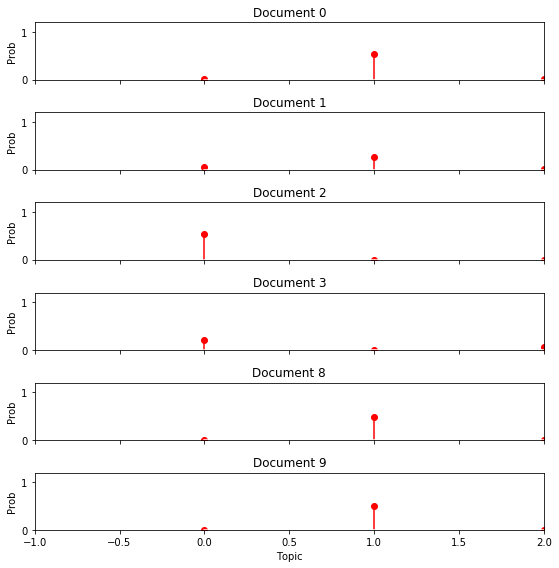

In [53]:
#计算文档主题分布图  
import matplotlib.pyplot as plt    
f, ax= plt.subplots(6, 1, figsize=(8, 8), sharex=True)    
for i, k in enumerate([0, 1, 2, 3, 8, 9]):    
    ax[i].stem(doc_topic[k,:], linefmt='r-',    
                       markerfmt='ro', basefmt='w-')    
    ax[i].set_xlim(-1, 2)     #x坐标下标  
    ax[i].set_ylim(0, 1.2)    #y坐标下标  
    ax[i].set_ylabel("Prob")    
    ax[i].set_title("Document {}".format(k))    
ax[5].set_xlabel("Topic")  
plt.tight_layout()  
plt.show()  

In [ ]:
import matplotlib.pyplot as plt    
f, ax= plt.subplots(2, 1, figsize=(6, 6), sharex=True)    
for i, k in enumerate([0, 1]):         #两个主题  
    ax[i].stem(topic_word[k,:], linefmt='b-',    
               markerfmt='bo', basefmt='w-')    
    ax[i].set_xlim(-2,20)    
    ax[i].set_ylim(0, 1)    
    ax[i].set_ylabel("Prob")    
    ax[i].set_title("topic {}".format(k))    
    
ax[1].set_xlabel("word")    
    
plt.tight_layout()    
plt.show()  